# EEG analysis in MNE Python

## create epochs and evoked data, re-reference the signal

### Aim: visualize epochs and evokeds

Author: Carina Forster

contact: forster@cbs.mpg.de

last updated 13.10.2024

In [24]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [25]:
#%matplotlib qt
%matplotlib inline

## Events and ERPs

In [28]:
# load real data (not preprocessed, feel to preprocss the data and run the erp script again)
main_exp_dir = Path("C:/", "Users", "Carina", "Desktop", "MNE", "hamburg_2024")
filename = "Pilot_022.vhdr"
raw = mne.io.read_raw_brainvision(Path(main_exp_dir, filename))

Extracting parameters from C:\Users\Carina\Desktop\MNE\hamburg_2024\Pilot_022.vhdr...
Setting channel info structure...


C:\Users\Carina\AppData\Local\Temp\ipykernel_7540\627733310.py:4: RuntimeWarning: No coordinate information found for channels ['IO1', 'IO2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(Path(main_exp_dir, filename))
C:\Users\Carina\AppData\Local\Temp\ipykernel_7540\627733310.py:4: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['IO1', 'IO2', 'SCR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(Path(main_exp_dir, filename))


In [29]:
raw.drop_channels('SCR');

In [30]:
raw.set_channel_types({'IO1': 'eog', 'IO2': 'eog'});

C:\Users\Carina\AppData\Local\Temp\ipykernel_7540\397152943.py:1: RuntimeWarning: The unit for channel(s) IO1, IO2 has changed from NA to V.
  raw.set_channel_types({'IO1': 'eog', 'IO2': 'eog'});


In [31]:
# let's filter the raw data 
raw.load_data().filter(0.1,40);

Reading 0 ... 2400139  =      0.000 ...  2400.139 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.7s


Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\Carina\miniforge3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


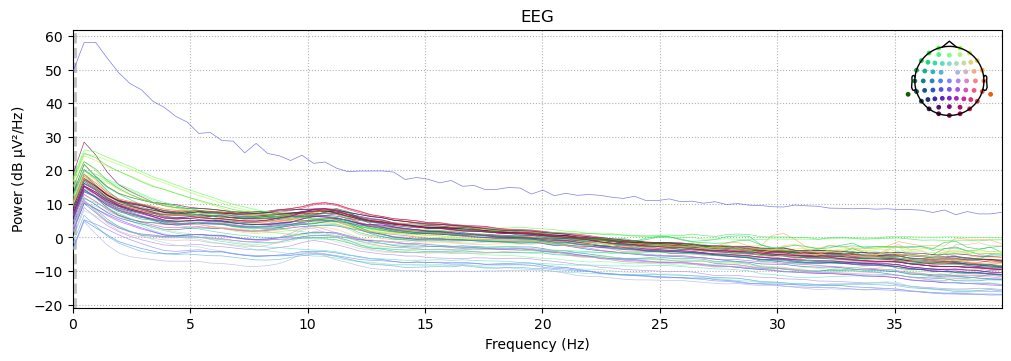

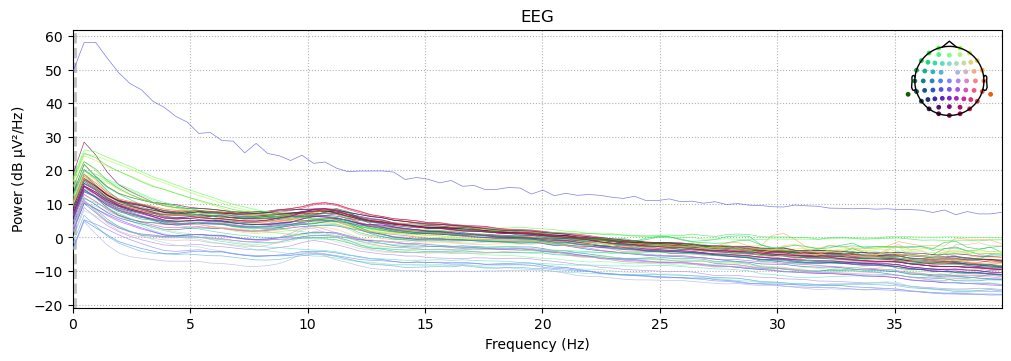

In [32]:
raw.compute_psd(fmax=40).plot()

In [33]:
raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


<div class="alert alert-block alert-warning">
<b>Discussion:</b>

How can we segment the data? 

based on triggers sent during the EEG recording (e.g. stimulus or response locked)

Why do we segment the data?

because we are usually interested in the  signal after or before a certain event

</div>

## Events

In [12]:
# for  this dataset we have annotations in the datastream (usually sent via a TTL pulse)
# in the example data we have a stimulus trigger channel, feel free to check out tutorial 2 from the liverpool workshop
events, events_dict = mne.events_from_annotations(raw)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 53', 'Stimulus/S 54', 'Stimulus/S 55', 'Stimulus/S 56', 'Stimulus/S 57', 'Stimulus/S 58', 'Stimulus/S 59', 'Stimulus/S 60', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64', 'Stimulus/S 65', 'Stimulus/S 66', 'Stimulus/S 67', 'Stimulus/S 68', 'Stimulus/S 69', 'Stimulus/S 70', 'Stimulus/S 71', 'Stimulus/S 72', 'Stimulus/S 73', 'Stimulus/S 74', 'Stimulus/S 75', 'Stimulus/S 76', 'Stimulus/S 77', 'Stimulus/S 78', 'Stimulus/S 79', 'Stimulus/S 80', 'Stimulus/S 81', 'Stimulus/S 82', 'Stimulus/S 83', 'Stimulus/S 84', 'Stimulus/S 85', 'Stimulus/S 86', 'Stimulus/S 87', 'Stimulus/S 88', 'Stimulus/S 89', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106', 'Stimulus/S107', 

<div class="alert alert-block alert-success">
<b>Exercise:</b>  

Check the events dictionary: 

What represents 

the first column: 

Second column: 

Third column: 
</div>

In [13]:
mne.viz.plot_events(events[1:15], sfreq=raw.info['sfreq']);

<div class="alert alert-block alert-success">
<b>Exercise:</b>  

How did the paradigm work?

What was the participants task? 

</div>

# create epochs based on events

In [15]:
epochs = mne.Epochs(raw, events, events_dict, tmin=-1, tmax=1, baseline=(None, None), preload=True)

Not setting metadata
604 matching events found
Setting baseline interval to [-1.0, 1.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 604 events and 2001 original time points ...
1 bad epochs dropped


In [16]:
# for those using MNE version 1.7.1 or higher you can create epochs directly from annotations 
# (if you have annotations in your data)
epochs = mne.Epochs(raw, tmin=-1, tmax=2, preload=True);

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 53', 'Stimulus/S 54', 'Stimulus/S 55', 'Stimulus/S 56', 'Stimulus/S 57', 'Stimulus/S 58', 'Stimulus/S 59', 'Stimulus/S 60', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64', 'Stimulus/S 65', 'Stimulus/S 66', 'Stimulus/S 67', 'Stimulus/S 68', 'Stimulus/S 69', 'Stimulus/S 70', 'Stimulus/S 71', 'Stimulus/S 72', 'Stimulus/S 73', 'Stimulus/S 74', 'Stimulus/S 75', 'Stimulus/S 76', 'Stimulus/S 77', 'Stimulus/S 78', 'Stimulus/S 79', 'Stimulus/S 80', 'Stimulus/S 81', 'Stimulus/S 82', 'Stimulus/S 83', 'Stimulus/S 84', 'Stimulus/S 85', 'Stimulus/S 86', 'Stimulus/S 87', 'Stimulus/S 88', 'Stimulus/S 89', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106', 'Stimulus/S107', 

<div class="alert alert-block alert-success">
<b>Exercise:</b>  

Extract the first epoch neutral and positive images

<div class="alert alert-block alert-success">
<b>Exercise:</b>  
Get all epochs with positive and  neutral images
</div>

### Let's plot our first Event related potential (ERP)


In [19]:
# let's average over all  positive image trials
evoked_positive = positive_epochs.average()

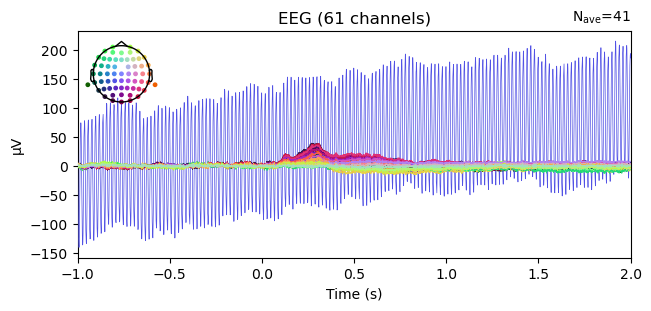

In [20]:
# let us plot the evoked data
evoked_positive.plot()

## Topomaps

In [21]:
# Specify times to plot at, as [min],[max],[stepsize]
times = np.arange(0, 0.5, 0.05)

positive_epochs.average().plot_topomap(times=times, average=0.050);
neutral_epochs.average().plot_topomap(times=times, average=0.050);

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

Do the topoplots differ? 

Do you expect them to differ?

</div>

## Re-referencing 
### or in other words: what are we actually measuring?

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

electrical potentials are always a relative measure, but relative to what?

relative to the reference electrode, all eeg channels are compared to this reference channel
the signal from the reference channel is subtracted  from all other channels thus it has a value of zero
relative differences between channels remain the same 

how about choosing a reference on the floor?

bad idea, choosing a reference on the head allows you to get rid of electromagnetic signals from the environment, which are common to all channels

when do I have to choose the reference electrode?

before you compare conditions

</div>

In [108]:
# always check the signal
evoked_positive.plot();
evoked_positive.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


In [22]:
# Usually we want to compare conditions
evoked_neutral = neutral_epochs.average()
mne.viz.plot_compare_evokeds({'positive image': evoked_positive, 'neutral image': evoked_neutral}, picks=['FC4']);

In [23]:
# add the standard montage for the cap layout used

In [128]:
evoked_neutral.plot_topo();

In [129]:
evoked_neutral.plot_topomap();

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

Which reference was used in the current data? 

We don't know, because we didn't collect the data. No channel is flat (zero), so probably average reference
or they already dropped the channel.


What to do if we don't know?

That's okay we can just re-reference the data after pre-processing.

</div> 

Average reference: the average potential across all electrodes is subtracted from each individual electrode

In [130]:
average_ref_epochs = epochs.copy().set_eeg_reference(ref_channels='average')
average_ref_epochs.average().plot();

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [133]:
# save the average re-referenced epochs
average_ref_epochs.save(Path(main_exp_dir, 'average_ref-epo.fif'), overwrite=True)

Check out [this page](https://neuraldatascience.io/7-eeg/erp_avg_reref.html) on re-referencing and the effects of different reference electrodes on the ERPs 

In [131]:
epochs.average().plot_topomap(times=times, average=0.050);
average_ref_epochs.average().plot_topomap(times=times, average=0.050);

<div class="alert alert-block alert-success">
<b>Exercise:</b>  


plot the re-referenced cleaned evoked contrast for left auditory vs left visual

plot the difference between the conditions

plot a shorter time window and a specific channel (you can choose which one)

</div>

In [136]:
# create difference wave
neutral_evo = average_ref_epochs[neutral_event_labels].average()
positive_evo = average_ref_epochs[positive_event_labels].average()

evokeds_diff = mne.combine_evoked([neutral_evo, positive_evo], 
                                  weights=[1, -1])

# plot both signals
mne.viz.plot_compare_evokeds({'neutral': neutral_evo, 
'positive': positive_evo});

# plot the difference wave
evokeds_diff.plot();

# plot specific channel and shorter time window
# plot both signals
mne.viz.plot_compare_evokeds({'neutral': neutral_evo.copy().crop(-0.2,1), 
'positive': positive_evo.copy().crop(-0.2,1)}, picks=['FC4'])

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


[<Figure size 800x600 with 2 Axes>]

### Take aways for re-referencing:

- a priori hypothesis of what ERP components and where the biggest difference potential should be

- re-referencing can't create a difference in the data that didn't exist before, it can only mask or unmask differences

- average reference is a safe option (can be done post data collection), but careful if you look at very broad ERPs (e.g. P300), average reference may attenuate the experimental effect
